# Agregación de datos por categoría

In [8]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income =["Poor", "Middle Class", "Rich"]

In [4]:
n= 500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
gender_data[1:10]

['Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female']

In [6]:
income_data[1:10]

['Middle Class',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich',
 'Poor']

In [79]:
#z -> N(0,1)
#N(m,s) -> m + s * z
height = 160 + 30 *np.random.randn(n)
weight = 55 + 25 *np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)
age_int = []

for i in range (n):
    age_int.append(int(age[i]))

In [72]:
data=pd.DataFrame (
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age_int,
        "Income": income
    }
)

In [73]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,150.069254,53.492151,29,15848.875384
1,Male,Middle Class,127.060891,97.202098,5,21103.251752
2,Female,Poor,180.409453,81.624796,54,23647.236362
3,Male,Poor,155.382731,58.159515,32,12857.513557
4,Male,Rich,172.785160,20.370139,51,18895.832755


## Agrupación de datos

In [26]:
grouped_gender = data.groupby("Gender")

In [27]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   5,   6,   8,   9,  11,  15,  16,  18,
             ...
             475, 479, 480, 481, 482, 484, 486, 488, 490, 493],
            dtype='int64', length=265),
 'Male': Int64Index([  1,   3,   4,   7,  10,  12,  13,  14,  17,  21,
             ...
             487, 489, 491, 492, 494, 495, 496, 497, 498, 499],
            dtype='int64', length=235)}

In [28]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight  Age        Income
0    Female            Poor  150.805878   49.652729   36  18513.686382
2    Female            Poor  115.646907   10.763024   12  20196.517801
5    Female    Middle Class  151.577160   41.915857   31  18983.819253
6    Female            Rich  162.597588  115.748991   38  21045.347204
8    Female            Rich  180.474864   65.083055   49  19859.370007
..      ...             ...         ...         ...  ...           ...
484  Female    Middle Class  135.807139   63.779073   16  21426.518713
486  Female    Middle Class  182.385671   79.566065   20  19735.364512
488  Female            Rich  119.141474   34.000866   41  20385.678239
490  Female            Rich  194.064445   76.171140   38  19444.461615
493  Female            Poor  156.916590   60.801165   25  18333.636921

[265 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age        Income
1     Male    Middle Class  201.417095  74.

In [30]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,150.805878,49.652729,36,18513.686382
2,Female,Poor,115.646907,10.763024,12,20196.517801
5,Female,Middle Class,151.577160,41.915857,31,18983.819253
6,Female,Rich,162.597588,115.748991,38,21045.347204
8,Female,Rich,180.474864,65.083055,49,19859.370007
...,...,...,...,...,...,...
484,Female,Middle Class,135.807139,63.779073,16,21426.518713
486,Female,Middle Class,182.385671,79.566065,20,19735.364512
488,Female,Rich,119.141474,34.000866,41,20385.678239
490,Female,Rich,194.064445,76.171140,38,19444.461615


In [31]:
double_group = data.groupby(["Gender", "Economic Status"])

In [32]:
len(double_group)

6

In [33]:
for names, groups in double_group:
    print (names)
    print (groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight  Age        Income
5    Female    Middle Class  151.577160   41.915857   31  18983.819253
11   Female    Middle Class  164.938320   24.779243   12  21458.313333
15   Female    Middle Class  173.934248  101.534984   12  18310.280172
23   Female    Middle Class  176.775110   28.305711   12  19170.990199
33   Female    Middle Class  134.887975   90.845424   33  21336.419905
..      ...             ...         ...         ...  ...           ...
460  Female    Middle Class  138.076065   33.941079   28  20209.380075
468  Female    Middle Class  158.016329   44.456882   24  20000.013156
472  Female    Middle Class  184.351812   30.240515   11  18863.448754
484  Female    Middle Class  135.807139   63.779073   16  21426.518713
486  Female    Middle Class  182.385671   79.566065   20  19735.364512

[70 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height     Weight  Age        Income
0    Fema

## Operaciones sobre datos agrupados

In [34]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     11236.971466  3980.531763  1740  1.390334e+06
       Poor             17750.787531  5636.949748  3089  2.177504e+06
       Rich             13812.831451  4448.718767  2478  1.667227e+06
Male   Middle Class     11880.715878  4060.262625  2094  1.431068e+06
       Poor             11522.100183  3997.867268  2101  1.411737e+06
       Rich             14131.160556  5249.606204  2803  1.762288e+06

In [36]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.528164  56.864739  24.857143  19861.909853
       Poor             159.917005  50.783331  27.828829  19617.152381
       Rich             164.438470  52.960938  29.500000  19847.941233
Male   Middle Class     162.749533  55.620036  28.684932  19603.664993
       Poor             160.029169  55.525934  29.180556  19607.465247
       Rich             157.012895  58.328958  31.144444  19580.981325

In [37]:
double_group.size()

Gender  Economic Status
Female  Middle Class        70
        Poor               111
        Rich                84
Male    Middle Class        73
        Poor                72
        Rich                90
dtype: int64

In [38]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      70.0  160.528164  31.978502   54.752298  145.296989   
       Poor             111.0  159.917005  29.046553   86.569117  142.069655   
       Rich              84.0  164.438470  31.906454   81.974006  144.157131   
Male   Middle Class      73.0  162.749533  31.596425  102.216118  145.846912   
       Poor              72.0  160.029169  28.433471   89.742548  142.203281   
       Rich              90.0  157.012895  26.729476   68.076667  137.391656   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     165.155720  183.068727  222.633948   70.0  56.864739   
       Poor             158.811420  178.050238  231.362837  111.0  50.783331   
       Rich             162.818522  188.600643  240.575527   84.0  52.960938   
Male   Middle Class     159.101045  180.921555  230.255500   73.0  55.620036   
       Poor             157.346054  182.535887  224.262229   72.0  55.525934   
       Rich             160.528771  173.363037  216.578266   90.0  58.328958   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  32.75  45.0   70.0  19861.909853  1067.328048   
       Poor             ...  36.00  52.0  111.0  19617.152381  1040.341048   
       Rich             ...  37.25  61.0   84.0  19847.941233   929.577007   
Male   Middle Class     ...  36.00  53.0   73.0  19603.664993   925.998012   
       Poor             ...  37.00  59.0   72.0  19607.465247   924.794180   
       Rich             ...  38.00  77.0   90.0  19580.981325   945.041925   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class     18033.668280  18991.843202  19748.685236   
       Poor             18037.086366  18684.916024  19513.028925   
       Rich             18127.667932  19084.481882  19812.574306   
Male   Middle Class     18006.675535  19078.340165  19504.633108   
       Poor             18033.912899  19032.576860  19586.444980   
       Rich             18012.578707  18820.558137  19515.903592   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20874.172520  21458.313333  
       Poor             20576.991781  21474.930238  
       Rich             20722.286981  21438.592953  
Male   Middle Class     20156.235927  21464.286446  
       Poor             20287.366236  21493.155915  
       Rich             20388.156564  21428.177566  

[6 rows x 32 columns]

In [39]:
grouped_income = double_group["Income"]

In [40]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      70.0  19861.909853  1067.328048  18033.668280   
       Poor             111.0  19617.152381  1040.341048  18037.086366   
       Rich              84.0  19847.941233   929.577007  18127.667932   
Male   Middle Class      73.0  19603.664993   925.998012  18006.675535   
       Poor              72.0  19607.465247   924.794180  18033.912899   
       Rich              90.0  19580.981325   945.041925  18012.578707   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18991.843202  19748.685236  20874.172520  21458.313333  
       Poor             18684.916024  19513.028925  20576.991781  21474.930238  
       Rich             19084.481882  19812.574306  20722.286981  21438.592953  
Male   Middle Class     19078.340165  19504.633108  20156.235927  21464.286446  
       Poor             19032.576860  19586.444980  20287.366236  21493.155915  
       Rich             18820.558137  19515.903592  20388.156564  21428.177566

In [41]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.390334e+06  24.857143  31.978502
       Poor             2.177504e+06  27.828829  29.046553
       Rich             1.667227e+06  29.500000  31.906454
Male   Middle Class     1.431068e+06  28.684932  31.596425
       Poor             1.411737e+06  29.180556  28.433471
       Rich             1.762288e+06  31.144444  26.729476

In [44]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     24.857143  5.056123
       Poor             27.828829  5.530510
       Rich             29.500000  5.184722
Male   Middle Class     28.684932  5.186531
       Poor             29.180556  5.667693
       Rich             31.144444  5.907057

In [45]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11236.971466  160.528164  31.978502  3980.531763   
       Poor             17750.787531  159.917005  29.046553  5636.949748   
       Rich             13812.831451  164.438470  31.906454  4448.718767   
Male   Middle Class     11880.715878  162.749533  31.596425  4060.262625   
       Poor             11522.100183  160.029169  28.433471  3997.867268   
       Rich             14131.160556  157.012895  26.729476  5249.606204   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     56.864739  22.492595  1740  24.857143  10.350783   
       Poor             50.783331  25.918813  3089  27.828829  11.262063   
       Rich             52.960938  27.155918  2478  29.500000  12.131310   
Male   Middle Class     55.620036  26.030716  2094  28.684932  11.389416   
       Poor             55.525934  22.206966  2101  29.180556  11.802753   
       Rich             58.328958  25.534569  2803  31.144444  12.187266   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.390334e+06  19861.909853  1067.328048  
       Poor             2.177504e+06  19617.152381  1040.341048  
       Rich             1.667227e+06  19847.941233   929.577007  
Male   Middle Class     1.431068e+06  19603.664993   925.998012  
       Poor             1.411737e+06  19607.465247   924.794180  
       Rich             1.762288e+06  19580.981325   945.041925

## Filtrado de datos

In [48]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      36
2      12
4      35
6      38
7      29
       ..
490    38
491     8
493    25
494    33
495    42
Name: Age, Length: 285, dtype: int64

## Transformación de variables

In [50]:
zscore = lambda x : (x - x.mean())/x.std()

In [54]:
z_group = double_group.transform(zscore)

In [10]:
import matplotlib.pyplot as plt

(array([  8.,  23.,  55., 119., 127., 105.,  46.,  13.,   2.,   2.]),
 array([-2.88452978, -2.21981888, -1.55510798, -0.89039708, -0.22568618,
         0.43902473,  1.10373563,  1.76844653,  2.43315743,  3.09786833,
         3.76257923]),
 <a list of 10 Patch objects>)

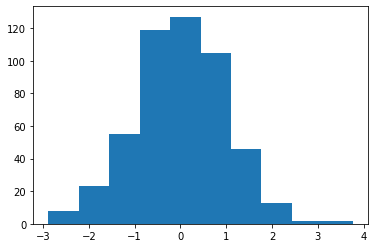

In [56]:
plt.hist(z_group["Age"])

In [57]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [58]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,150.805878,49.652729,36,18513.686382
1,201.417095,74.849373,35,21340.080438
2,115.646907,10.763024,12,20196.517801
3,157.193572,69.542891,30,20127.224884
4,129.116020,6.375439,35,18740.409638
...,...,...,...,...
495,167.442881,88.541239,42,18353.541559
496,143.404655,8.639307,16,19893.620356
497,134.768531,85.029580,31,19675.783596
498,180.921555,76.891807,36,19920.487692


## Operaciones diversas muy útiles

In [59]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,150.805878,49.652729,36,18513.686382
1,Male,Middle Class,201.417095,74.849373,35,21340.080438
3,Male,Poor,157.193572,69.542891,30,20127.224884
4,Male,Rich,129.116020,6.375439,35,18740.409638
5,Female,Middle Class,151.577160,41.915857,31,18983.819253
6,Female,Rich,162.597588,115.748991,38,21045.347204


In [60]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
486,Female,Middle Class,182.385671,79.566065,20,19735.364512
490,Female,Rich,194.064445,76.171140,38,19444.461615
493,Female,Poor,156.916590,60.801165,25,18333.636921
495,Male,Rich,167.442881,88.541239,42,18353.541559
498,Male,Middle Class,180.921555,76.891807,36,19920.487692
499,Male,Poor,166.599047,56.955378,23,19486.496383


In [61]:
double_group.nth(32)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class      80.602998  75.241577   23  19279.422295
       Poor             173.903845  43.639551   18  21387.087736
       Rich             151.619904  34.861426   39  21183.279675
Male   Middle Class     109.591532  50.577874   34  21339.194701
       Poor             133.579365  54.538914   22  19086.369306
       Rich             160.760237  96.401640   43  19781.021158

In [80]:
data_sorted = data.sort_values(["Age", "Income"])

In [81]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
136,Male,Poor,179.815607,55.060919,-12,21449.526331
208,Male,Rich,209.398039,41.666346,-8,14664.438203
345,Male,Poor,202.657215,14.021994,0,18375.053905
274,Female,Rich,148.909799,30.988653,0,23545.820722
77,Female,Poor,129.283150,75.187468,3,15610.658452
1,Male,Middle Class,127.060891,97.202098,5,21103.251752
360,Male,Middle Class,158.486520,69.745066,6,16372.456076
248,Female,Middle Class,163.343605,26.909557,6,20523.877022
253,Female,Poor,126.264957,78.685627,7,19484.368897
25,Male,Rich,141.454783,59.787124,8,14878.327532


In [82]:
age_grouped = data_sorted.groupby("Gender")

In [83]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
136,Male,Poor,179.815607,55.060919,-12,21449.526331
274,Female,Rich,148.909799,30.988653,0,23545.820722


In [84]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
149,Male,Middle Class,196.354286,34.030366,64,15865.479323
200,Female,Rich,210.592024,38.767650,64,17318.465426


# Conjunto de entrenamiento y conjunto de testing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
len(data)

3333

## Dividir utilizando la distribución normal

In [6]:
a = np.random.randn(len(data))

(array([  3.,  62., 283., 701., 928., 804., 402., 129.,  18.,   3.]),
 array([-3.45533529, -2.71561884, -1.9759024 , -1.23618595, -0.49646951,
         0.24324693,  0.98296338,  1.72267982,  2.46239627,  3.20211271,
         3.94182916]),
 <a list of 10 Patch objects>)

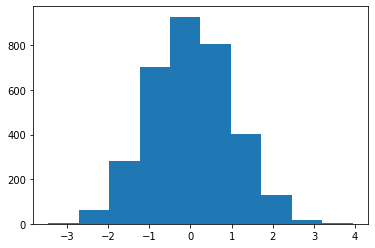

In [11]:
plt.hist(a)

In [94]:
check = (a<.8)

In [95]:
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 731.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2602.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

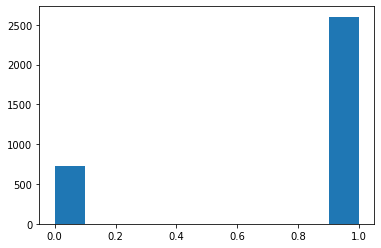

In [96]:
plt.hist(check.astype(int))

In [97]:
training = data[check]
testing = data[~check]

In [100]:
len(training)/len(data)
len(training)

2602

In [101]:
len(testing)/len(data)
len(testing)

731

## Con la librería sklearn

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train, test = train_test_split(data, test_size = .2)

In [86]:
len(train)

2666

In [87]:
len(test)

667

## Usando una función de shuffle

In [108]:
import sklearn

In [109]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [110]:
data = sklearn.utils.shuffle(data)

In [111]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [112]:
len(train_data)

2499

In [113]:
len(test_data)

833